<a href="https://colab.research.google.com/github/Ravikant2003/Online-Product-Review-Analyzer/blob/main/Product_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your CSV file for analysis.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving Dataset-SA.csv to Dataset-SA.csv
Uploaded file: Dataset-SA.csv


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression ###
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.91      0.93      2551
    Negative       0.89      0.84      0.86      3322
     Neutral       0.98      0.99      0.99     25020

    accuracy                           0.97     30893
   macro avg       0.94      0.92      0.93     30893
weighted avg       0.97      0.97      0.97     30893



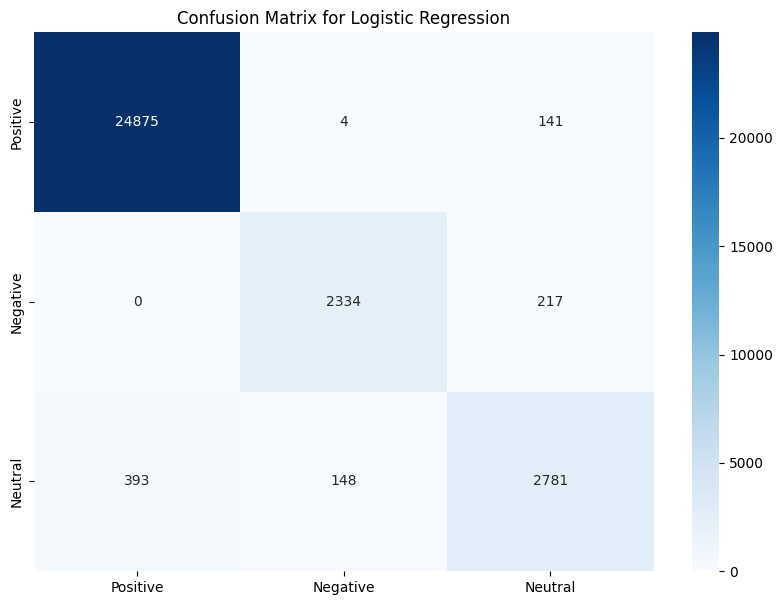

### Random Forest ###
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

    Positive       0.90      0.95      0.92      2551
    Negative       0.90      0.72      0.80      3322
     Neutral       0.97      0.99      0.98     25020

    accuracy                           0.96     30893
   macro avg       0.92      0.89      0.90     30893
weighted avg       0.96      0.96      0.96     30893



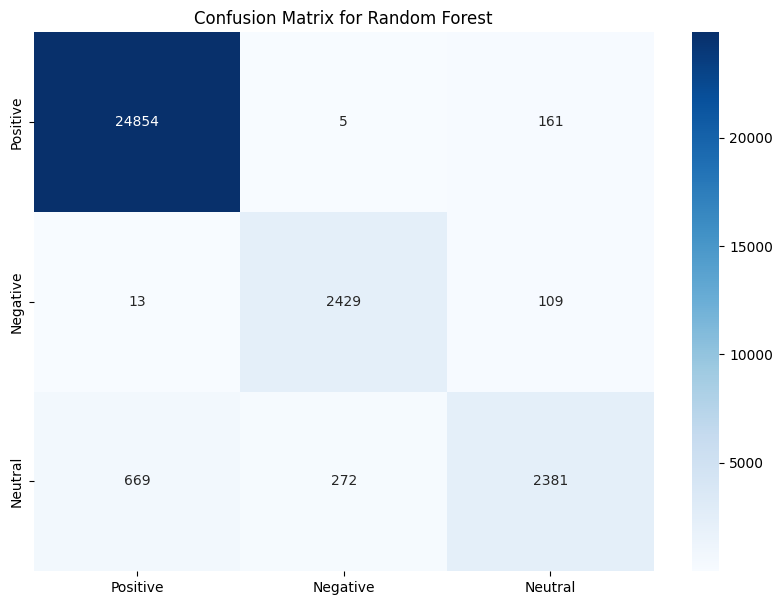

### MLP Classifier ###
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.95      0.95      2551
    Negative       0.89      0.88      0.89      3322
     Neutral       0.99      0.99      0.99     25020

    accuracy                           0.98     30893
   macro avg       0.94      0.94      0.94     30893
weighted avg       0.98      0.98      0.98     30893



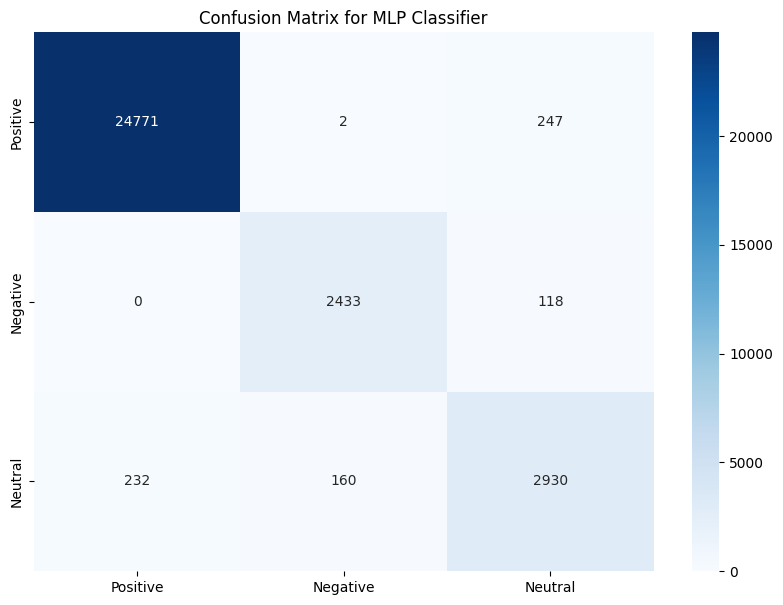

### SVM ###
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

    Positive       0.95      0.93      0.94      2551
    Negative       0.89      0.88      0.88      3322
     Neutral       0.99      0.99      0.99     25020

    accuracy                           0.97     30893
   macro avg       0.94      0.93      0.94     30893
weighted avg       0.97      0.97      0.97     30893



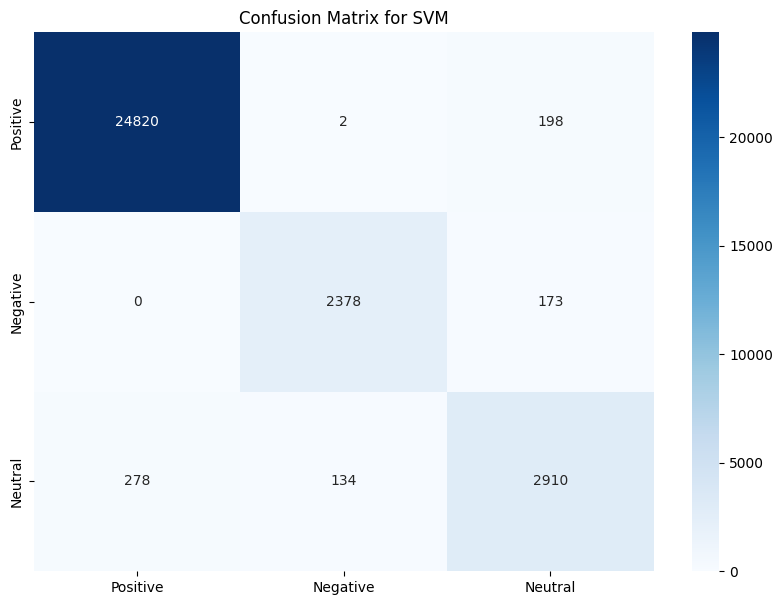

### Best Logistic Regression Model ###
Accuracy: 0.98
Enter a product review to analyze: It is the best product ever
The sentiment of the review is: Positive
Enter a product review to analyze: It is neither good nor bad
The sentiment of the review is: Neutral
Enter a product review to analyze: This smartphone is amazing! The camera quality is top-notch, and the battery life lasts all day. Highly recommended
The sentiment of the review is: Positive
Enter a product review to analyze: The product is okay. It does what it’s supposed to do, but there’s nothing exceptional about it.
The sentiment of the review is: Positive
Enter a product review to analyze: This tablet is decent for basic tasks. It's not the fastest, but it gets the job done for browsing and light work.
The sentiment of the review is: Neutral
Enter a product review to analyze: The jacket fits well and is comfortable, but the color is not as vibrant as it appeared online.
The sentiment of the review is: Positive
Enter a produ

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Download stopwords if not already available
nltk.download('stopwords')

# Function to upload the file
def upload_file():
    uploaded = files.upload()  # This will prompt the user to upload a file
    for file_name in uploaded.keys():
        print(f"Uploaded file: {file_name}")
        return file_name

# Load and preprocess the dataset
def preprocess_data(file_path):
    df = pd.read_csv(file_path)

    # Handle Missing Values
    df.dropna(inplace=True)

    # Clean 'product_price' column
    df['product_price'] = df['product_price'].replace('[\₹,]', '', regex=True)
    df = df[pd.to_numeric(df['product_price'], errors='coerce').notnull()]
    df['product_price'] = df['product_price'].astype(int)

    # Handle Duplicates
    df.drop_duplicates(inplace=True)

    # Combine 'Summary' and 'Review' columns into a new column
    df['combined_text'] = df['Summary'] + " " + df['Review']

    # Remove Stopwords from the combined text
    stop_words = set(stopwords.words('english'))
    df['preprocessed_text'] = df['combined_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

    # Perform Sentiment Analysis
    df['sentiment'] = df['preprocessed_text'].apply(get_sentiment_label)

    return df

# Define the sentiment analysis function with adjusted threshold
def get_sentiment_label(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.17:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.17:
        return 'Negative'
    else:
        return 'Neutral'

# Train and evaluate models
def train_and_evaluate_models(df):
    # Initialize the TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

    # Fit and transform the preprocessed text data
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=42)

    # Initialize and train multiple classifiers
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(random_state=42),
        'MLP Classifier': MLPClassifier(random_state=42),
        'SVM': SVC(kernel='linear', random_state=42)
    }

    # Train and evaluate each model
    model_reports = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred, target_names=['Positive', 'Negative', 'Neutral']),
            'Confusion Matrix': confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative', 'Neutral'])
        }
        model_reports[model_name] = report

    # Hyperparameter tuning for Logistic Regression
    param_grid_logreg = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
        'max_iter': [200, 300, 400, 500, 600]  # Increase the maximum number of iterations
    }

    grid_search_logreg = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search_logreg.fit(X_train, y_train)

    best_params_logreg = grid_search_logreg.best_params_
    best_model_logreg = grid_search_logreg.best_estimator_
    best_model_logreg_accuracy = best_model_logreg.score(X_test, y_test)

    model_reports['Best Logistic Regression Model'] = {
        'Best Hyperparameters': best_params_logreg,
        'Accuracy': best_model_logreg_accuracy
    }

    return tfidf_vectorizer, model_reports, best_model_logreg

# Function to analyze a single review
def analyze_review(review_text, tfidf_vectorizer, best_model):
    # Preprocess user input
    stop_words = set(stopwords.words('english'))
    user_review_cleaned = ' '.join([word for word in review_text.split() if word.lower() not in stop_words])
    user_review_tfidf = tfidf_vectorizer.transform([user_review_cleaned])

    # Predict sentiment using the best model
    sentiment = best_model.predict(user_review_tfidf)
    return sentiment[0]

# Main function
def main():
    print("Upload your CSV file for analysis.")
    file_path = upload_file()

    # Load and preprocess data
    df = preprocess_data(file_path)
    tfidf_vectorizer, model_reports, best_model_logreg = train_and_evaluate_models(df)

    # Print model evaluation results
    for model_name, report in model_reports.items():
        print(f'### {model_name} ###')
        print(f"Accuracy: {report['Accuracy']:.2f}")

        # Display Classification Report if it exists
        if 'Classification Report' in report:
            print("Classification Report:")
            print(report['Classification Report'])

        # Display Confusion Matrix if it exists
        if 'Confusion Matrix' in report:
            cm = report['Confusion Matrix']
            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
            plt.title(f'Confusion Matrix for {model_name}')
            plt.show()

    # Analyze a review provided by the user
    review_text = input("Enter a product review to analyze: ")
    while review_text!="exit":
      sentiment = analyze_review(review_text, tfidf_vectorizer, best_model_logreg)
      print(f"The sentiment of the review is: {sentiment}")
      review_text = input("Enter a product review to analyze: ")

if __name__ == "__main__":
    main()
